In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import os
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [50]:
weather_original = pd.read_csv('../data/weather_orig.csv')
weather = pd.read_csv('../data/weather_new.csv')

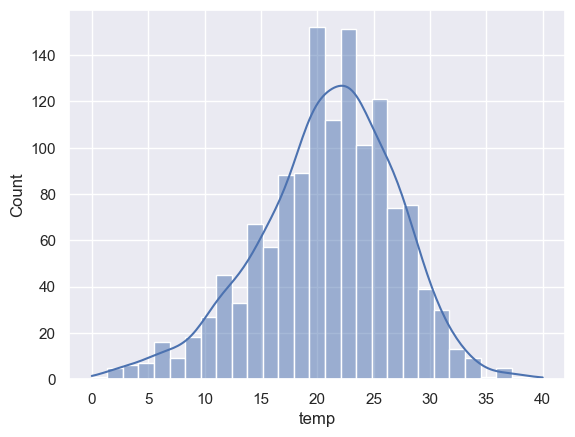

In [51]:
# Create a distribution plot of the temperature
sns.histplot(weather['temp'], kde=True)
plt.show()

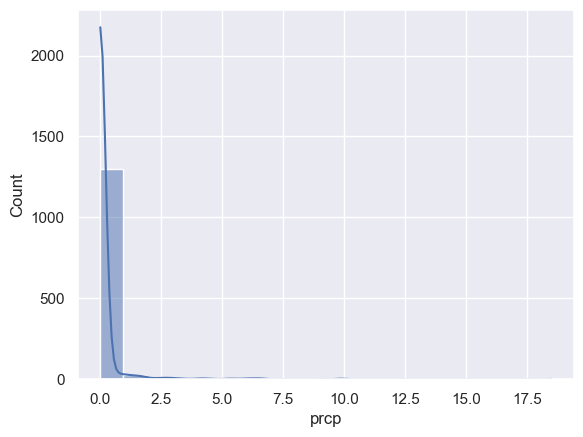

In [52]:
sns.histplot(weather['prcp'], kde=True, bins=20)
plt.show()

In [53]:
weather['prcp'].describe()

count    1353.000000
mean        0.149520
std         0.906388
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.500000
Name: prcp, dtype: float64

In [54]:
weather['prcp'].value_counts()

prcp
0.0     1250
0.3       18
0.5       16
1.0        8
1.3        6
1.5        6
0.8        6
1.8        5
0.2        4
0.1        3
6.1        2
2.8        2
3.0        2
6.6        2
2.5        2
2.3        2
4.1        2
9.9        2
5.3        2
4.6        1
2.7        1
0.9        1
3.6        1
1.1        1
3.3        1
9.1        1
5.8        1
6.4        1
18.5       1
2.0        1
4.3        1
1.7        1
Name: count, dtype: int64

In [55]:
weather['coco'].value_counts()

coco
3.0     40
1.0     27
2.0     22
7.0      7
8.0      6
5.0      5
9.0      5
4.0      3
26.0     2
Name: count, dtype: int64

In [56]:
# for na values in coco, we fill with 1 if prcp = 0, 7 if prcp <= .4,  8 if prcp <= 2.5, 9 if prcp > 2.5

for i in range(len(weather)):
    if pd.isna(weather['coco'][i]):
        if weather['prcp'][i] == 0:
            weather['coco'][i] = 1
        elif weather['prcp'][i] <= .4:
            weather['coco'][i] = 7
        elif weather['prcp'][i] <= 2.5:
            weather['coco'][i] = 8
        else:
            weather['coco'][i] = 9
            
weather['coco'].value_counts()

coco
1.0     1180
8.0       52
3.0       40
7.0       26
9.0       23
2.0       22
5.0        5
4.0        3
26.0       2
Name: count, dtype: int64

<Axes: xlabel='coco', ylabel='Count'>

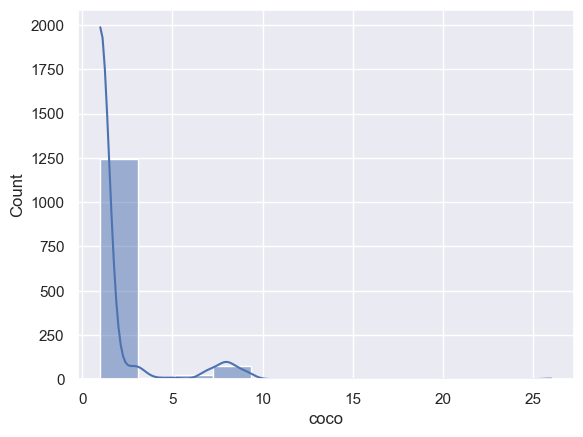

In [57]:
sns.histplot(weather['coco'], kde=True)

In [58]:
michigan = weather[weather['location'] == ' Michigan']

michigan[michigan['prcp'] != 0]

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,year,date,location
228,16.1,15.0,93.0,0.3,NaN,190.0,11.2,NaN,1008.5,NaN,7.0,1985,1985-6-16,Michigan
403,19.4,18.9,97.0,0.5,NaN,190.0,9.4,NaN,1008.0,NaN,8.0,1994,1994-8-21,Michigan
502,21.7,20.0,90.0,6.6,NaN,300.0,5.4,NaN,1012.9,NaN,9.0,1998,1998-8-16,Michigan
585,17.8,17.2,96.0,2.8,NaN,30.0,5.4,NaN,1010.4,NaN,9.0,2001,2001-8-19,Michigan
784,16.7,15.6,93.0,0.3,NaN,90.0,16.6,NaN,1014.4,NaN,7.0,2007,2007-8-21,Michigan
1156,19.4,18.2,93.0,0.3,NaN,60.0,14.8,NaN,1015.1,NaN,7.0,2018,2018-6-10,Michigan
1190,20.0,20.0,100.0,1.5,NaN,80.0,11.2,NaN,1015.0,NaN,8.0,2019,2019-6-10,Michigan


In [59]:
weather_original.dropna(subset = 'prcp', inplace = True)

In [60]:
for date in weather_original['date']:
    if date not in weather['date'].values:
        weather.loc[len(weather)] = weather_original[weather_original['date'] == date].values[0]

In [61]:
for date in weather_original['date']:
    # Check if prcp of weather_original > weather
    if weather_original[weather_original['date'] == date]['prcp'].values[0] != weather[weather['date'] == date]['prcp'].values[0]:
        print(date)